## 2024: Week 3 Performance Against Targets
The world is swimming in data and with so many sources everywhere, it's often on you to tie them together. Most data tools need to read from a single data so will use Unions, Joins and Logical Relationship models to tie them together. In this week's challenge we will introduce you to joining data sets together to prepare them for analysis. 

This week's challenge is to link together a Quarterly Sales Target data source (an Excel Workbook) with our original sales data (Week One output). Is Prep Air meeting its targets?

Input
Week One's output files and Week Three's new input: 
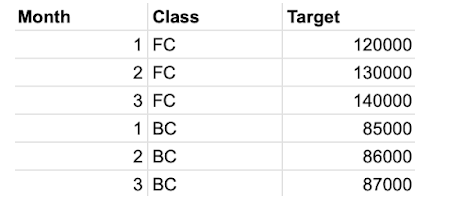

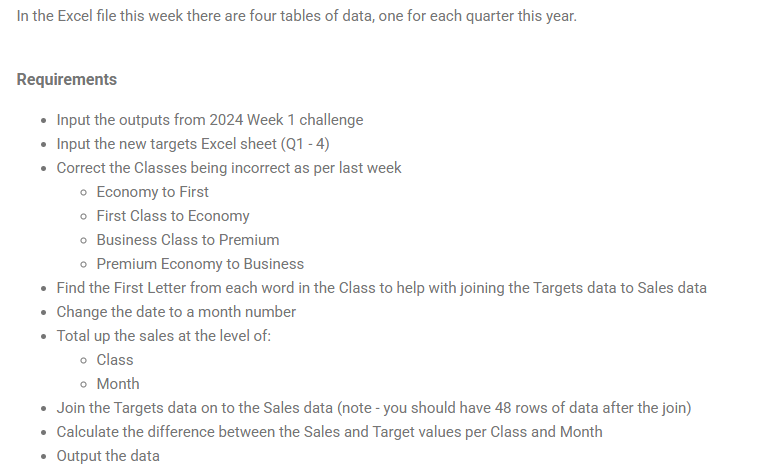

In [31]:
import pandas as pd

In [32]:
# read the required files
df_flow = pd.read_csv('./data/PD 2024 Wk 1 Output Flow Card.csv')
df_non_flow = pd.read_csv('./data/PD 2024 Wk 1 Output Non-Flow Card.csv')
df_sales = pd.concat((df_flow, df_non_flow))
sales_target = pd.read_excel('./data/PD 2024 Wk 3 Input.xlsx', sheet_name=['Q1', 'Q2', 'Q3', 'Q4'])

In [33]:
df_sales.head(5)

,Date,Flight Number,From,To,Class,Price,Flow Card?,Bags Checked,Meal Type
0,22/07/2024,PA010,Tokyo,New York,Economy,2380.0,Yes,0,Egg Free
1,20/04/2024,PA002,New York,London,Economy,3490.0,Yes,1,Vegan
2,23/01/2024,PA010,Tokyo,New York,Premium Economy,825.0,Yes,1,Vegetarian
3,05/06/2024,PA006,Tokyo,London,First Class,618.0,Yes,3,Vegan
4,30/03/2024,PA004,Perth,London,First Class,446.0,Yes,1,Nut Free


In [34]:
# Join the data in different sheets together
sales_target = pd.concat((sales_target['Q1'],
                          sales_target['Q2'],
                          sales_target['Q3'],
                          sales_target['Q4']))
sales_target.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 0 to 11
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   48 non-null     int64 
 1   Class   48 non-null     object
 2   Target  48 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.5+ KB


In [35]:
# Correct the class names
class_mapping = {
    "Economy": "First",
    "First Class": "Economy",
    "Business Class": "Premium",
    "Premium Economy": "Business"
}
df_sales.Class = df_sales.Class.apply(lambda c:class_mapping.get(c, c))

In [36]:
df_sales.head()

,Date,Flight Number,From,To,Class,Price,Flow Card?,Bags Checked,Meal Type
0,22/07/2024,PA010,Tokyo,New York,First,2380.0,Yes,0,Egg Free
1,20/04/2024,PA002,New York,London,First,3490.0,Yes,1,Vegan
2,23/01/2024,PA010,Tokyo,New York,Business,825.0,Yes,1,Vegetarian
3,05/06/2024,PA006,Tokyo,London,Economy,618.0,Yes,3,Vegan
4,30/03/2024,PA004,Perth,London,Economy,446.0,Yes,1,Nut Free


In [37]:
sales_target.Class.unique()

array(['FC', 'BC', 'PE', 'E'], dtype=object)

In [38]:
# Create a class abbreviations column to use it when joining the two dataframes
class_abbrev = {
    'First': 'FC',
    'Economy': 'E',
    'Premium': 'BC',
    'Business': 'PE'
}
df_sales['Class'] = df_sales.Class.apply(lambda c:class_abbrev.get(c, c))
df_sales.head()

,Date,Flight Number,From,To,Class,Price,Flow Card?,Bags Checked,Meal Type
0,22/07/2024,PA010,Tokyo,New York,FC,2380.0,Yes,0,Egg Free
1,20/04/2024,PA002,New York,London,FC,3490.0,Yes,1,Vegan
2,23/01/2024,PA010,Tokyo,New York,PE,825.0,Yes,1,Vegetarian
3,05/06/2024,PA006,Tokyo,London,E,618.0,Yes,3,Vegan
4,30/03/2024,PA004,Perth,London,E,446.0,Yes,1,Nut Free


In [39]:
# change the type of the Date column to datetime
df_sales.Date = pd.to_datetime(df_sales.Date, dayfirst=True)

# Change the date to a month number
df_sales.Date = df_sales.Date.dt.month


In [40]:
# total up the sales at the level of : [Class, Month]
df_sales_total = df_sales.groupby(['Class', 'Date'])['Price'].sum().reset_index()
df_sales_total.head()

,Class,Date,Price
0,BC,1,48555.6
1,BC,2,46335.6
2,BC,3,47875.2
3,BC,4,38233.2
4,BC,5,43833.6


In [41]:
df = pd.merge(df_sales_total, sales_target, how='inner', left_on=['Class', 'Date'], right_on=['Class', 'Month'])
df.drop('Month', axis=1, inplace=True)

In [42]:
df['Difference to Target'] = df.Price - df.Target

In [58]:
df.head()

,Class,Date,Price,Target,Difference to Target
0,BC,1,48555.6,85000,-36444.4
1,BC,2,46335.6,86000,-39664.4
2,BC,3,47875.2,87000,-39124.8
3,BC,4,38233.2,88000,-49766.8
4,BC,5,43833.6,89000,-45166.4
